In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
import pycountry
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print('Successfully loaded')
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-candidates-for-general-election-2019/LS_2.0.csv
Successfully loaded


In [2]:
data = pd.read_csv('/kaggle/input/indian-candidates-for-general-election-2019/LS_2.0.csv')
data.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [3]:
data = data.rename(columns={"CRIMINAL\nCASES": "Criminal", "GENERAL\nVOTES": "Genral_votes","POSTAL\nVOTES":"Postal_votes","TOTAL\nVOTES":"Total_votes"})


In [4]:
data = data.dropna()

In [5]:
Num_cons = data.groupby('STATE')['CONSTITUENCY'].nunique().sort_values(ascending = False).reset_index()

ax = px.bar(Num_cons,y='CONSTITUENCY',x='STATE',color = 'CONSTITUENCY')
ax.show()

### Uttar Pradesh has the highest number of CONSTITUENCY with 80 and the second is 48 from Maharashtra


In [6]:
# Data Cleaning
data['Criminal'] = data['Criminal'].replace('Not Available','0').astype('int')

In [7]:
data['EDUCATION'] = data['EDUCATION'].replace('Post Graduate\n','Post Graduate')
data['EDUCATION'] = data['EDUCATION'].replace('Not Available','Others')
education = data['EDUCATION'].value_counts().reset_index()
education.columns = ['EDUCATION','COUNT']
ax = px.bar(education,x = 'EDUCATION', y = 'COUNT',color = 'EDUCATION')
ax.show()

In [8]:
winner = data[data['WINNER']==1]
ax = px.bar(winner,x = 'EDUCATION',y = 'WINNER').update_xaxes(categoryorder = "total descending")
ax.show()

### The highest number of Winners were Post Graduate

In [9]:
young_winner = data[data['WINNER']==1]
young_winner = young_winner.sort_values('AGE').head(10)
ax = px.bar(young_winner,x = 'NAME',y = 'AGE',color = 'AGE',hover_data = ['PARTY','STATE','CONSTITUENCY'])
ax.show()

### The youngest was from Andhra Pradesh - Age 26

In [10]:
old_winner = data[data['WINNER']==1]
old_winner = old_winner.sort_values('AGE',ascending = False).head(10)
ax = px.bar(old_winner,x = 'NAME',y = 'AGE',color = 'AGE',hover_data = ['PARTY','STATE','CONSTITUENCY'])
ax.show()

### The oldest winner was of the AGE -86 (Uttar Pradesh)

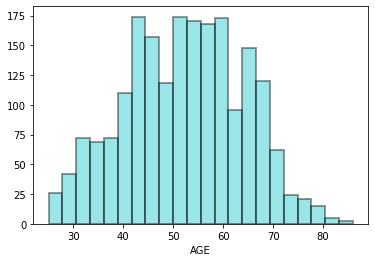

In [11]:
sns.distplot(data['AGE'],
             kde=False,
             hist_kws=dict(edgecolor="black", linewidth=2),
             color='#00BFC4')

In [12]:
criminal_cases = data.groupby('PARTY')['Criminal'].sum().reset_index().sort_values('Criminal',ascending=False).head(30)
ax = px.bar(criminal_cases, x = 'PARTY',y = 'Criminal',color = 'PARTY')
ax.show()

### The highest number of criminals were in BJP, Congress was quite closeby

In [13]:
crime = data[data['WINNER']==1]
criminal_cases = crime.groupby('PARTY')['Criminal'].sum().reset_index().sort_values('Criminal',ascending=False).head(30)
ax = px.bar(criminal_cases, x = 'PARTY',y = 'Criminal',color = 'PARTY')
ax.show()

### We can clearly see the number of WINNERS and those who had criminal records were high for BJP

In [14]:
## changing the datatype
data['GENDER'] = data['GENDER'].astype('category') 
data['WINNER'] = data['WINNER'].astype('category') 

In [15]:
Female_winners = data[(data['WINNER']==1) & (data['GENDER']=='FEMALE')]
ax = px.histogram(Female_winners, 'STATE')
ax.show()

### Highest number of Female winners were from West Bengal

In [16]:
male_winners = data[(data['WINNER']==1) & (data['GENDER']=='MALE')]
ax = px.histogram(male_winners, 'STATE')
ax.show()

In [17]:
votes = data.groupby('STATE')['Total_votes'].sum().sort_values(ascending = False).reset_index()
ax = px.bar(votes,x = 'STATE',y = 'Total_votes',color='STATE')
ax.show()

### Total votes casted is highest in UP were the highest.

In [18]:
category = data['CATEGORY'].value_counts().reset_index()
category.columns= ['CATEGORY','COUNT']
ax = px.bar(category,x = 'CATEGORY', y = 'COUNT', color = 'CATEGORY')
ax.show()

- We can see that the number of candidates from GENERAL is the highest.

In [19]:
df = data[data['WINNER']==1]
category = df['CATEGORY'].value_counts().reset_index()
category.columns= ['CATEGORY','COUNT']
ax = px.bar(category,x = 'CATEGORY', y = 'COUNT', color = 'CATEGORY')
ax.show()